# Introduction

This notebook will be used to complete the kaggle competition `Spaceship-Titanic`

## Imports


In [1]:
# Operating system
import os

# Data manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

# Machine Learning Algos
import sklearn 


In [2]:
os.getcwd()

'/home/mattgpaul/Documents/Python Projects/Spaceship-Titanic'

## Import Train/Test Data

In [3]:
train = pd.read_csv(os.getcwd() + '/data/train.csv')
test = pd.read_csv(os.getcwd() + '/data/test.csv')

In [4]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Data Exploration

In [7]:
def MissingData(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    md = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    md = md[md['Percent'] > 0]
    
    return md

In [8]:
missing_train = MissingData(train)
missing_train

,Total,Percent
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


In [9]:
missing_test = MissingData(test)
missing_test

,Total,Percent
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
CryoSleep,93,2.174421
VIP,93,2.174421
Destination,92,2.151040
Age,91,2.127660
HomePlanet,87,2.034136


In [10]:
def UniqueCategorical(df):
    cats = df[df.dtypes[df.dtypes == 'object'].index]
    cat_stats = cats.describe()
    pct_unique = (cat_stats.loc['unique']/cat_stats.loc['count'])*100
    
    return pct_unique

In [11]:
train_unique_cats = UniqueCategorical(train)
train_unique_cats

PassengerId        100.0
HomePlanet      0.035327
CryoSleep       0.023596
Cabin          77.230987
Destination     0.035249
VIP             0.023557
Name           99.764512
dtype: object

In [12]:
test_unique_cats = UniqueCategorical(test)
test_unique_cats

PassengerId        100.0
HomePlanet      0.071599
CryoSleep       0.047801
Cabin          78.166148
Destination     0.071685
VIP             0.047801
Name           99.832656
dtype: object

# Data Cleaning

So it looks like I have both empty values and some very large outliers.

## Null Values

Not very large percentage of missing values, about `2.5%` for both the training and the test set. Therefore, it is safe to say we dont need to drop any features from the dataset. However, we do need to fill these values. In light of the fact that we have some pretty hefty outliers, it makes sense to use the median rather than the mean to fill the values. However, we may come back and change this if our cleaning of outliers causes us to revert back to using a mean, assuming it makes more sense.

## Outliers

Based on our `std` and `max` values from our describe method for the train and test set, we have someone who is spending quite a lot on amenities. A good approach here is to perhaps identify how many data points are outside a high quantile for the data (say `90%`?). If there are relatively low number of data points in that area that represent the outliers we are seeing, and especially if they all belong to the same person/people, it may be worth simply assigning a more appropriate value to the data, rather than just dropping it. Who knows, this will likely take some trial and error.

In [13]:
numbers = [col for col in train.columns if train[col].dtype in ['int64','float64']]
categories = [col for col in train.columns if train[col].dtype == 'object' and col != 'Transported']

In [14]:
train[train[numbers] > train[numbers].quantile(0.95)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,3576.0,NaN,6715.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3329.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6819.0,NaN,1643.0,NaN,NaN,NaN
8689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1872.0,NaN,NaN,NaN,NaN
8691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3235.0,NaN,NaN


Im willing to bet here that our big spenders (and spenders in general) have opted out of cryo sleep. It may be worth separating them in that fashion

In [15]:
train_awake = train[train['CryoSleep'] == False]
test_awake = test[test['CryoSleep'] == False]

train_asleep = train[train['CryoSleep'] == True]
test_asleep = test[test['CryoSleep'] == True]

print('Percent of "training" passengers awake is {}'.format((len(train_awake)/len(train))*100))

Percent of "training" passengers awake is 62.56758311284942


Lets see if the asleep people stayed asleep the whole time (which would likely be shown in their spending habits equaling 0)

In [16]:
train_asleep[numbers][(train_asleep[numbers].isnull() == False) & (train_asleep[numbers] > 0.0)].any()

Age              True
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
dtype: bool

In [17]:
test_asleep[numbers][(test_asleep[numbers].isnull() == False) & (test_asleep[numbers] > 0.0)].any()

Age              True
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
dtype: bool

Well this helps a lot. The only `True` value we are seeing for asleep passengers is their age. So now we know we can fill the null values for the numerical features with `0.0` for passengers that are asleep.

In [25]:
foo = train.copy()
bar = train_asleep.copy()

bar[numbers] = bar[numbers].fillna(0.0)

foo.replace(bar, inplace=True)



Age             True
RoomService     True
FoodCourt       True
ShoppingMall    True
Spa             True
VRDeck          True
dtype: bool

In [81]:
# Set training and test data of cryosleep passengers with null numerical values to 0
train_nulls = train_asleep.isnull().any().nonzero()[0]
train_nulls

AttributeError: 'Series' object has no attribute 'nonzero'

# Data Plotting

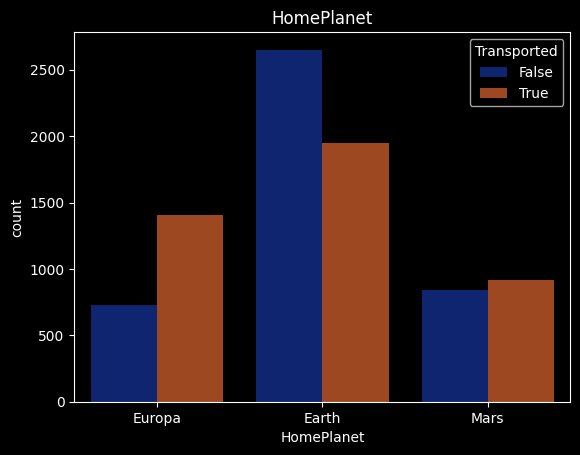

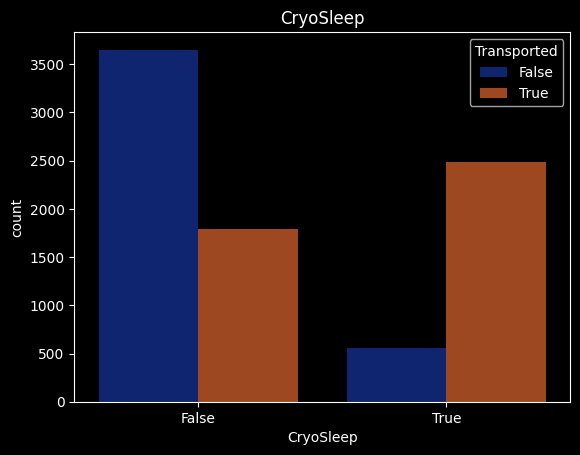

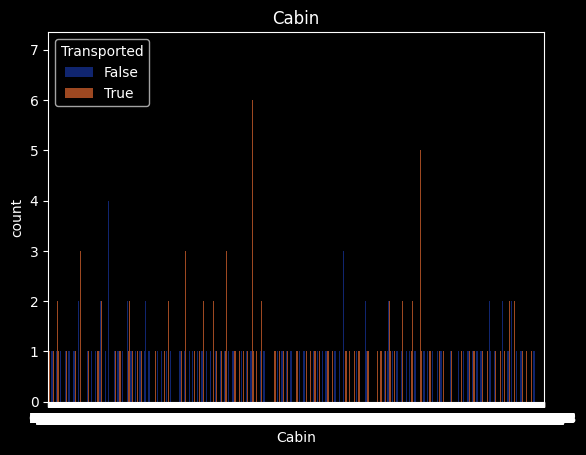

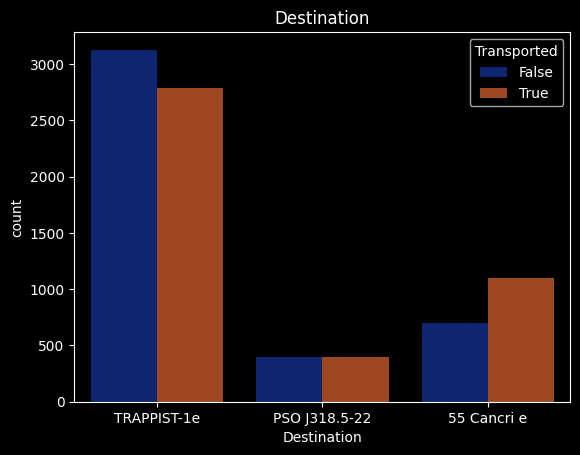

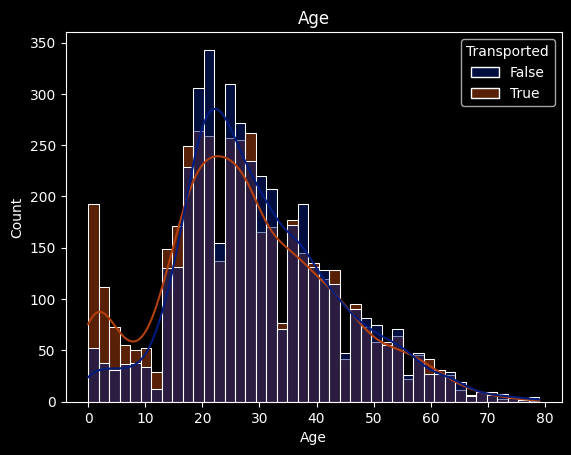

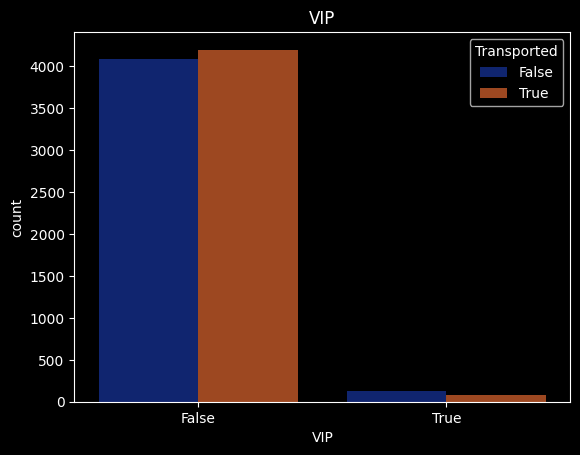

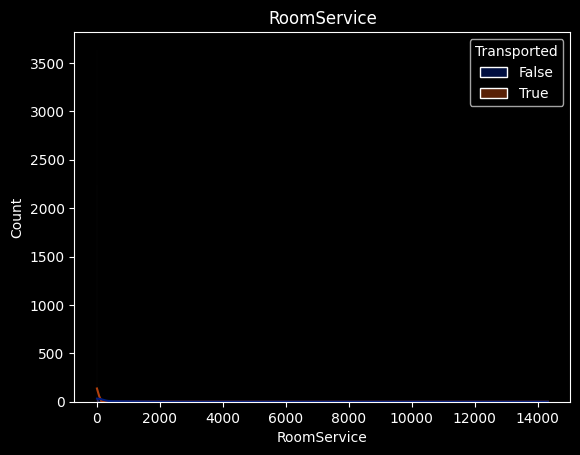

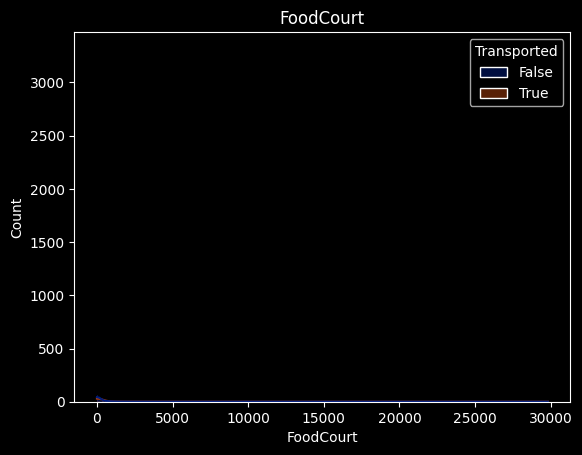

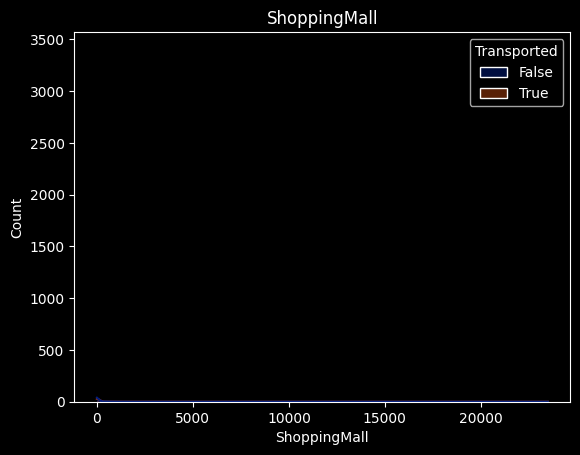

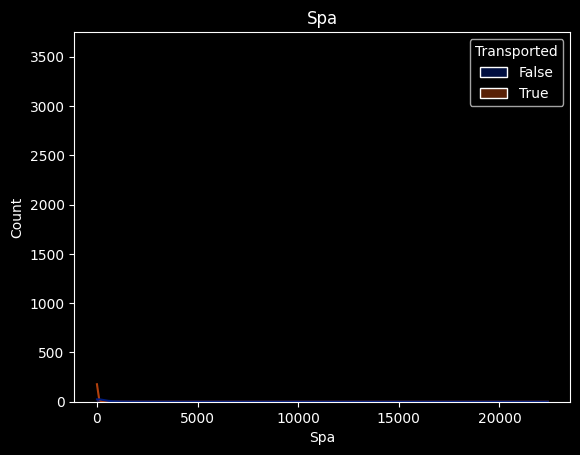

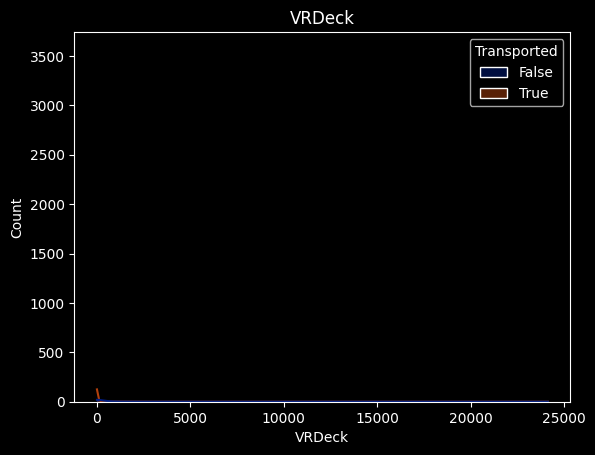

In [37]:
for col in [x for x in train.columns if x != 'Transported']:
    if train[col].dtype in ['int64','float64']:
        sns.histplot(data=train, x=col, hue='Transported', kde=True, palette='dark').set(title=col)
        plt.show()
    else:
        if train_unique_cats[col] < 95:
            sns.countplot(data=train, x=col, hue='Transported', palette='dark').set(title=col)
            plt.show()